In [13]:
import matplotlib.pyplot as plt
import numpy as np
import json

data = None
with open('../data/diamond.json', 'r') as f:
    data = json.load(f)

data_old = None
with open('../data/diamond-old.json', 'r') as f:
    data_old = json.load(f)

# combine data from old and new
# data = {**data_old, **data}

basis = []
nkpt = []
kecut = []
method = []
for d in data:
    basis.append(data[d].get('basis', ''))
    nkpt.append(int(data[d].get('nkpt', 0)))
    ke_cutoff = data[d].get('ke_cutoff', 0)
    if ke_cutoff != 'None':
        kecut.append(float(ke_cutoff))
    method.append(data[d].get('method', ''))
for d in data_old:
    basis.append(data_old[d].get('basis', ''))
    nkpt.append(int(data_old[d].get('nkpt', 0)))
    ke_cutoff = data_old[d].get('ke_cutoff', 0)
    if ke_cutoff != 'None':
        kecut.append(float(ke_cutoff))
    method.append(data_old[d].get('method', ''))
basis = list(set(basis))
nkpt = list(set(nkpt))
kecut = list(set(kecut))
method = list(set(method))

nkpt.sort()
kecut.sort()
print(method)

color = {'FFTISDF': 'b', 'GDF': 'r', 'FFTDF': 'g'}

print(basis)

['fftdf', 'fftisdf-20', 'fftisdf-10', 'fftisdf-30', 'fftisdf-40', 'gdf']
['gth-szv', 'gth-dzvp']


In [14]:

def plot_time(method, nkpt, basis, kecut):
    fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True, sharey=True)
    for ikey, key in enumerate(['time_build', 'time_vjk', 'time_trans2e']):
        ax = axs[ikey]
        for m in method:
            x = []
            y = []
            for n in nkpt:
                for p, d in data.items():
                    is_in_list = False
                    d_b = d.get('basis', '')
                    d_k = d.get('ke_cutoff', 0.0)
                    d_k = float(d_k) if d_k != 'None' else 0.0
                    d_n = int(d.get('nkpt', 0))
                    d_m = d.get('method', '')
                    # print(d_b, d_k, d_n, basis, kecut, n, is_in_list)
                    is_in_list = (d_b == basis)
                    if m != 'gdf':
                        is_in_list = is_in_list and (d_k == kecut)
                    is_in_list = is_in_list and (d_n == n)
                    is_in_list = is_in_list and (d_m == m)
                    t = d.get(key, np.nan)
                    if is_in_list:
                        x.append(n)
                        y.append(t)

            label = m.split('-')[0].upper()
            x = np.log2(x)
            ax.semilogy(x, y, c=color[label], label=label, marker='>', base=2, linestyle='--')
            ax.set_xlim(x.min(), x.max())
            # ax.set_yticklabels([])
            ax.grid(True)
            x = []
            y = []
            for n in nkpt:
                for p, d in data_old.items():
                    is_in_list = False
                    d_b = d.get('basis', '')
                    d_k = d.get('ke_cutoff', 0.0)
                    d_k = float(d_k) if d_k != 'None' else 0.0
                    d_n = int(d.get('nkpt', 0))
                    d_m = d.get('method', '')
                    # print(d_b, d_k, d_n, basis, kecut, n, is_in_list)
                    is_in_list = (d_b == basis)
                    if m != 'gdf':
                        is_in_list = is_in_list and (d_k == kecut)
                    is_in_list = is_in_list and (d_n == n)
                    is_in_list = is_in_list and (d_m == m)
                    t = d.get(key, np.nan)
                    if is_in_list:
                        x.append(n)
                        y.append(t)

            label = m.split('-')[0].upper()
            x = np.log2(x)
            ax.semilogy(x, y, c=color[label], label=label, marker='>', base=2, linestyle='--')
            ax.set_xlim(x.min(), x.max())
            # ax.set_yticklabels([])
            ax.grid(True)


    ax = axs[-1]
    ax.set_xlabel('N$_{k}$')
    ax.set_ylabel('Time (s)')
    axs[0].legend(loc='upper left', bbox_to_anchor=(0, 1.35), ncol=3, fontsize=12)

    fig.tight_layout()
    fig.show()


/tmp/ipykernel_3497402/63701422.py:30: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xlim(x.min(), x.max())
/tmp/ipykernel_3497402/63701422.py:57: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xlim(x.min(), x.max())


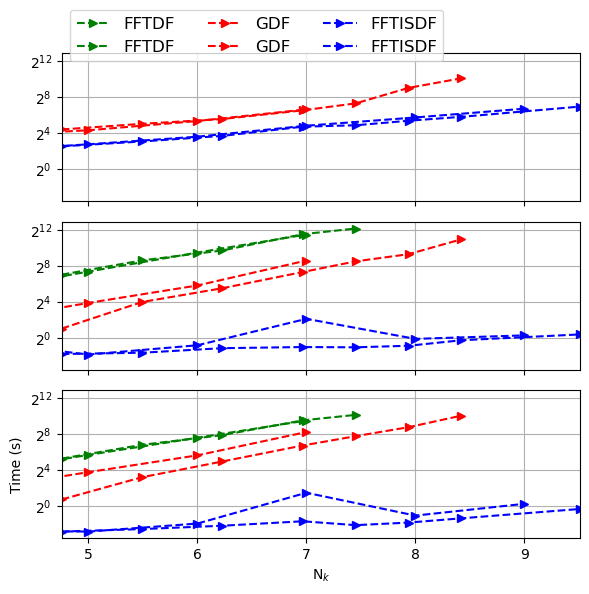

In [15]:
nkpt = nkpt
kecut = 50.0
basis = 'gth-szv'
method = ['fftdf', 'gdf', 'fftisdf-10']
plot_time(method, nkpt, basis, kecut)

/tmp/ipykernel_3497402/63701422.py:30: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xlim(x.min(), x.max())
/tmp/ipykernel_3497402/63701422.py:57: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xlim(x.min(), x.max())


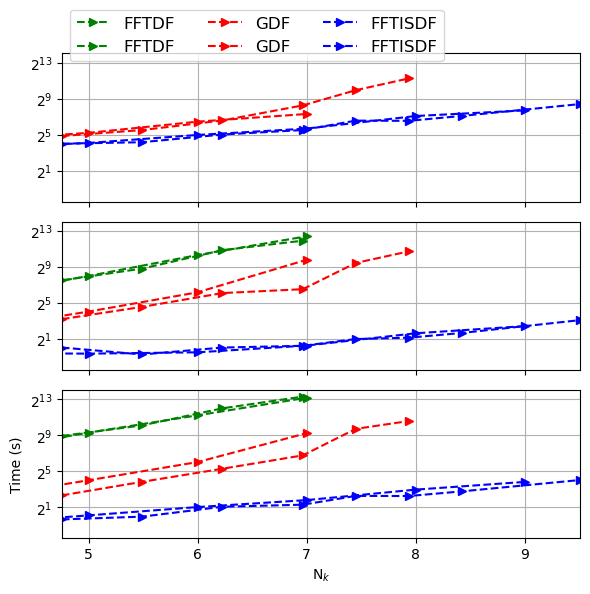

In [16]:
nkpt = nkpt
kecut = 100.0
basis = 'gth-dzvp'
method = ['fftdf', 'gdf', 'fftisdf-10']
plot_time(method, nkpt, basis, kecut)

/tmp/ipykernel_3497402/63701422.py:30: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xlim(x.min(), x.max())
/tmp/ipykernel_3497402/63701422.py:57: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xlim(x.min(), x.max())


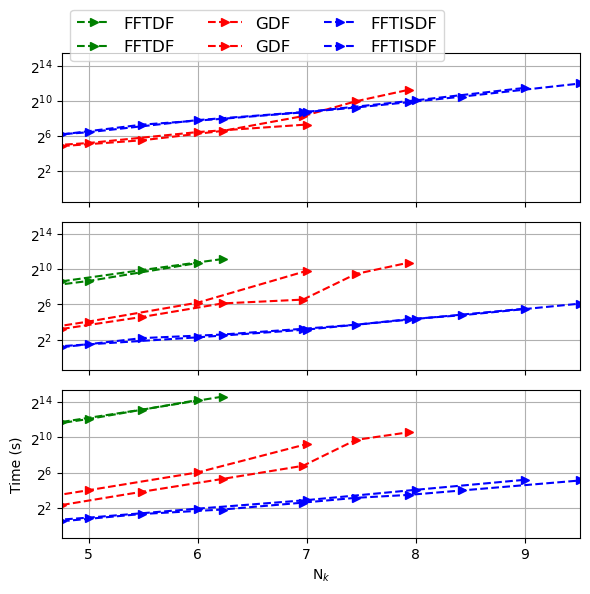

In [17]:
nkpt = nkpt
kecut = 400.0
basis = 'gth-dzvp'
method = ['fftdf', 'gdf', 'fftisdf-20']
plot_time(method, nkpt, basis, kecut)

/tmp/ipykernel_3497402/63701422.py:30: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xlim(x.min(), x.max())
/tmp/ipykernel_3497402/63701422.py:57: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xlim(x.min(), x.max())


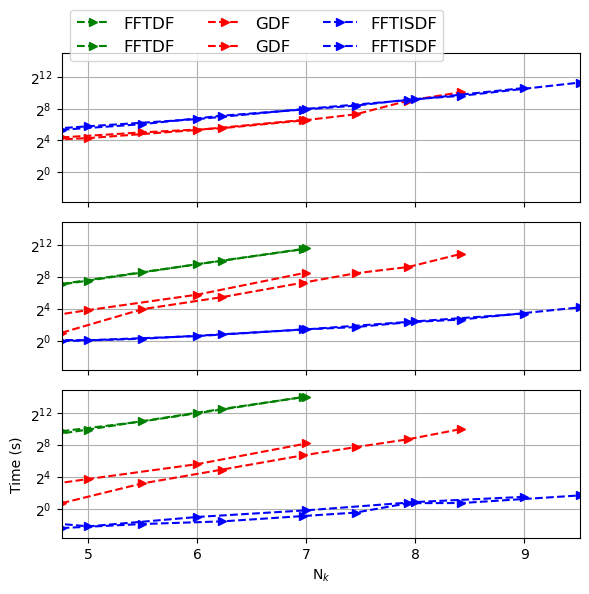

In [18]:
nkpt = nkpt
kecut = 400.0
basis = 'gth-szv'
method = ['fftdf', 'gdf', 'fftisdf-40']
plot_time(method, nkpt, basis, kecut)